In [116]:
import numpy as np
import matplotlib . pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed (0)
centers = [[ -5 , 0] , [0 , 1.5]]
X , y = make_blobs ( n_samples =1000 , centers = centers ,random_state =40)
transformation = [[0.4 , 0.2] , [ -0.4 , 1.2]]
X = np.dot(X , transformation )

# Add a bias term to the feature matrix
X = np.c_[np.ones((X.shape [0] , 1)), X]

# Initialize coefficients
W = np.zeros(X.shape [1])

# Define the logistic sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the logistic loss ( binary cross - entropy ) function
def log_loss(y_true, y_pred):
    epsilon = np.exp(-15)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon) # Clip to avoid log (0)
    return -( y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
# Gradient descent and Newton method parameters
learning_rate = 0.1
iterations = 10
loss_history = []

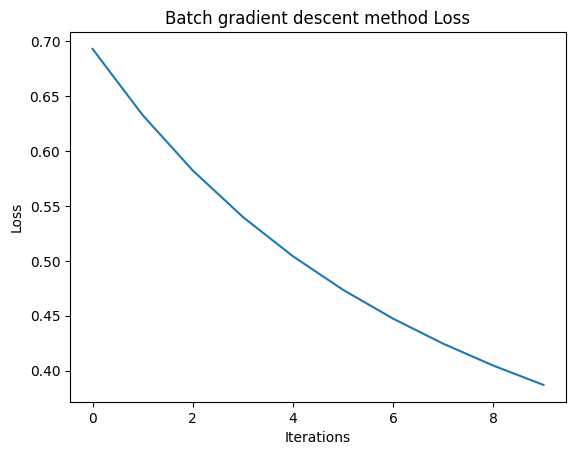

In [117]:
# Performing gradient descent based weight update
N = len(y)

for i in range(iterations):
    y_pred = sigmoid(np.dot(X,W))
    #yt = np.diag(y_pred - y)
    #print(W.shape)
    #grad = np.dot(np.diag(y_pred - y), X)
    grad = (np.dot(np.ones(N).T, np.dot(np.diag(y_pred - y),X)) / N)

    #print(grad)
    W -= learning_rate*grad
    #break
    loss = np.sum(log_loss(y, y_pred))/N
    loss_history.append(loss)

plt.plot(range(iterations),loss_history)
plt.title("Batch gradient descent method Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

### Newton's Method

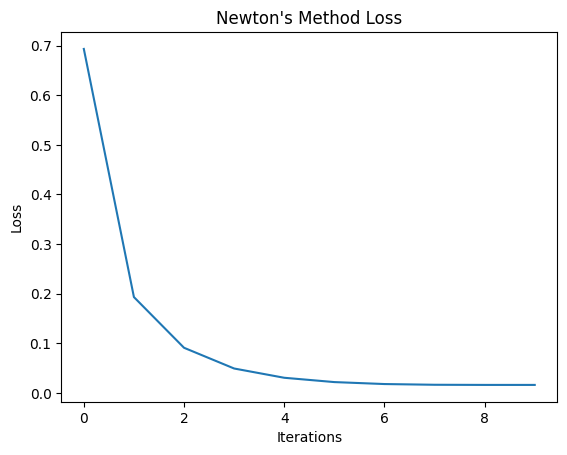

In [111]:
# Performing Newton's method based weight update
from numpy.linalg import inv

W = np.zeros(X.shape[1])
loss_history_newton = []

for i in range(iterations):
    y_pred = sigmoid(np.dot(X, W))
    
    s = (y_pred - y) * (1 - y_pred - y)
    S = np.diag(s)
    grad_1 = inv(np.dot(np.dot(X.T, S), X) / len(y))
    grad_2 = np.dot(np.dot(np.ones(len(y)).T, np.diag(y_pred - y)), X) / len(y)
    
    grad_newton = np.dot(grad_1, grad_2)
    
    W -= grad_newton
    
    loss = np.sum(log_loss(y, y_pred))/N
    loss_history_newton.append(loss)

plt.plot(range(iterations), loss_history_newton)
plt.title("Newton's Method Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

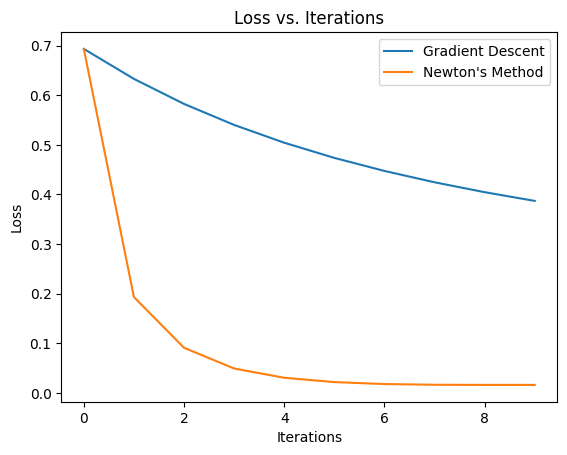

In [112]:
plt.plot(range(iterations), loss_history, label='Gradient Descent')
plt.plot(range(iterations), loss_history_newton, label="Newton's Method")
plt.title("Loss vs. Iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()


# Question 2

In [115]:
import numpy as np
import matplotlib . pyplot as plt
from sklearn . datasets import fetch_openml
from sklearn . linear_model import LogisticRegression
from sklearn . model_selection import GridSearchCV , train_test_split
from sklearn . pipeline import Pipeline
from sklearn . preprocessing import StandardScaler
from sklearn . metrics import accuracy_score
from sklearn . utils import check_random_state
from sklearn.decomposition import PCA
# data loading
train_samples = 500
X, y = fetch_openml ("mnist_784", version =1, return_X_y =True , as_frame = False )
random_state = check_random_state (0)
permutation = random_state.permutation (X.shape [0])
X = X[ permutation ]
y = y[ permutation ]
X = X. reshape ((X. shape [0] , -1))
X_train , X_test , y_train , y_test = train_test_split (X, y, train_size = train_samples , test_size =100)

In [134]:
logistic = LogisticRegression(penalty='l1', solver='liblinear', multi_class='auto')

# Define a Standard Scaler to normalize inputs
scaler = StandardScaler()
#pca = PCA()
pipe = Pipeline(steps=[("scaler", scaler), ("logistic", logistic)])
param_grid = {
    "logistic__C": np.logspace(-2, 2, 9),
}


In [140]:
search = GridSearchCV(pipe, param_grid)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.770):
{'logistic__C': 1.0}


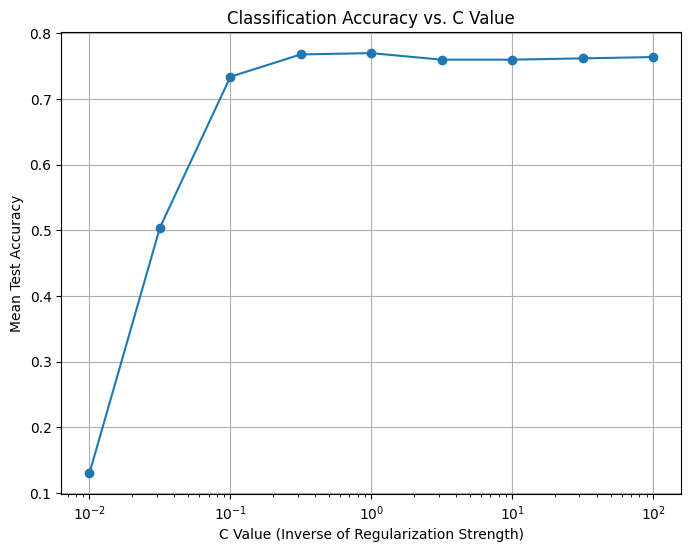

In [141]:
import matplotlib.pyplot as plt

# Get the cross-validation results
results = search.cv_results_

# Extract mean test scores and C values
mean_test_scores = results['mean_test_score']
C_values = param_grid['logistic__C']

# Plot the results
plt.figure(figsize=(8, 6))
plt.semilogx(C_values, mean_test_scores, marker='o')
plt.title('Classification Accuracy vs. C Value')
plt.xlabel('C Value (Inverse of Regularization Strength)')
plt.ylabel('Mean Test Accuracy')
plt.grid(True)
plt.show()


In [142]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Predict on the test set using the best C value
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Confusion Matrix:\n{confusion}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Confusion Matrix:
[[ 7  0  1  0  0  1  1  0  0  0]
 [ 0 12  0  0  0  0  0  0  0  0]
 [ 0  1  3  0  0  0  1  0  0  0]
 [ 0  0  0  7  0  2  0  1  0  0]
 [ 0  0  0  0 13  0  0  0  0  1]
 [ 0  0  0  0  0  9  0  0  1  0]
 [ 0  0  0  0  1  1  7  0  0  0]
 [ 0  0  0  1  0  0  0  4  0  0]
 [ 0  0  0  0  1  1  0  0 11  1]
 [ 0  0  0  0  2  0  0  2  0  7]]
Precision: 0.80
Recall: 0.78
F1-score: 0.78
